In [102]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sys
sys.path.append('..')
from stattests.tests import *
from stattests.generation import generate_data
from stattests.utils import plot_cdf, plot_summary, apply_all_tests, title2codenames, rpv, frame_from_params, plot_from_params
import seaborn as sns
sns.set_style("whitegrid")
from tqdm import tqdm

import sys
import numpy as np
import matplotlib.pyplot as plt
import imageio

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
list(getattr(tqdm, '_instances'))
for instance in list(tqdm._instances):
    tqdm._decr_instances(instance)

# Sample gif

In [103]:
success_rate = 0.02
uplift = 0.1 
beta = 10
N = 5000
NN = 2000
skews = np.linspace(1, 10, 20)

params = []
for skew in skews:
    params.append({'success_rate': success_rate, 'uplift': uplift, 'beta': beta, 'skew': skew, 'N': N, 'NN': NN})

Сгенерируем данные для гифки, работает оч долго. Для дефолтных парметров можно скипнуть, она уже отрабатывала

In [106]:
# for param in tqdm(params):
#     apply_all_tests('../data', **param)

100%|██████████| 20/20 [03:48<00:00, 11.40s/it]


Нарисуем картинку для одного семпла

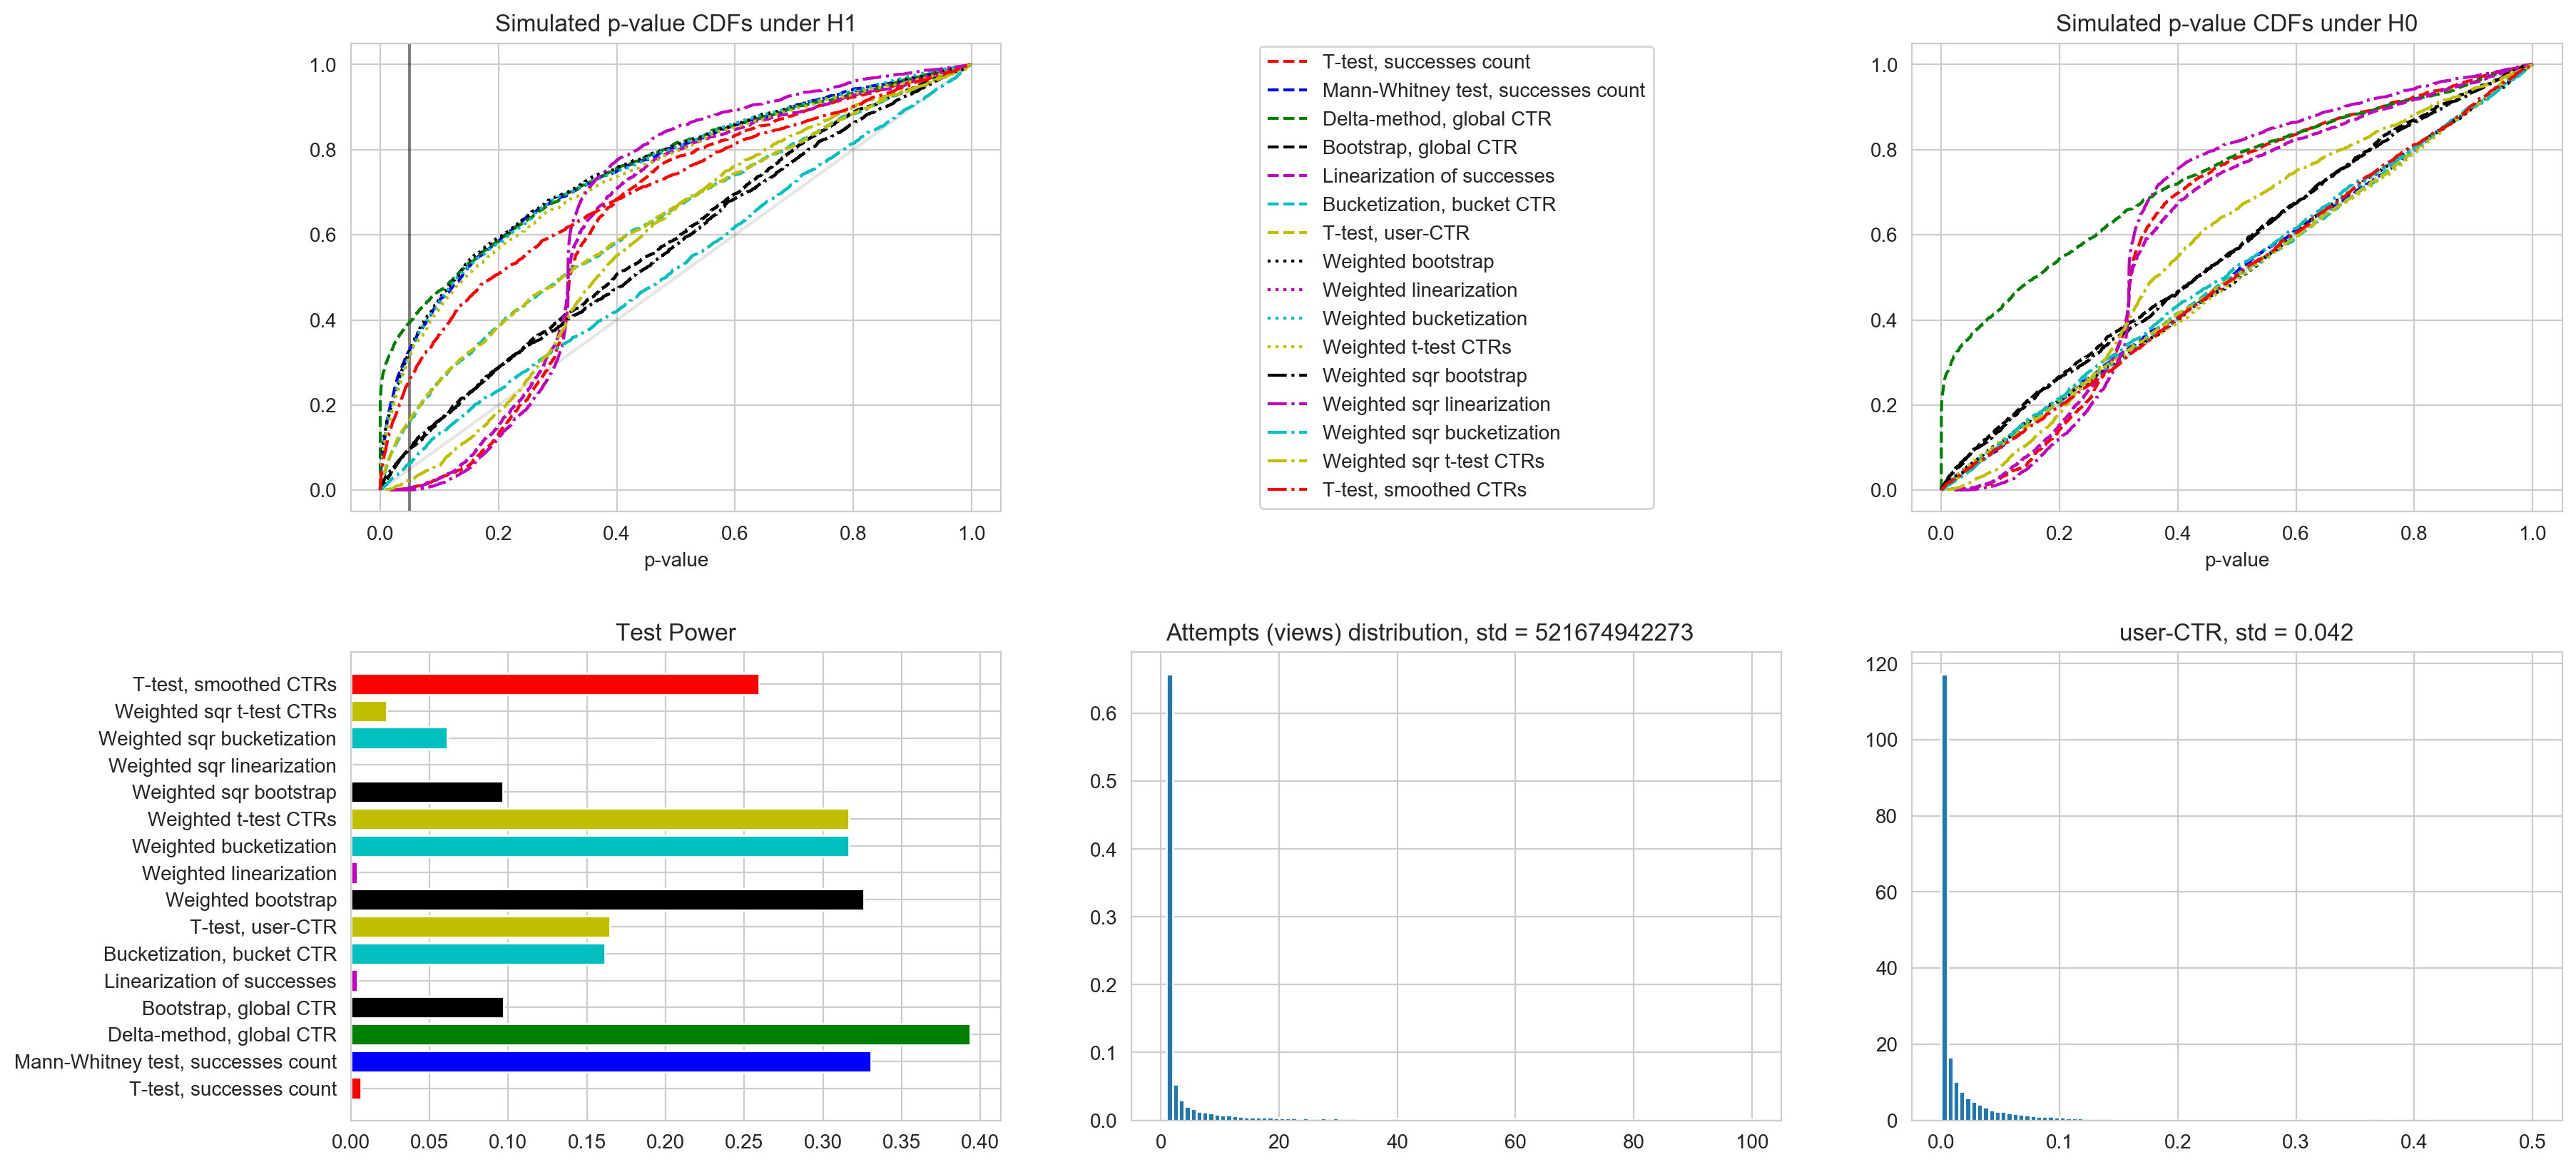

In [109]:
from random import sample
fig = plot_from_params('../data', sample(params, k=1)[0])

Сделаем заебатую гифку

In [ ]:
frames = [frame_from_params('../data', p) for p in params]
imageio.mimsave('./powers.gif', frames, fps=2, format='GIF-FI', quantizer='nq')

![./powers.gif](./powers.gif)

# Global CTR fuckup

Пример ручного запуска

In [94]:
success_rate = 0.02
uplift = 0.1 
beta = 10
N = 5000
NN = 2000
skew = 1

In [95]:
ab_params = {'success_rate': success_rate, 'uplift': uplift, 'beta': beta, 'skew': skew, 'N': N, 'NN': NN}
aa_params = {'success_rate': success_rate, 'uplift': 0.0, 'beta': beta, 'skew': skew, 'N': N, 'NN': NN}

(attempts_0_ab, successes_0_ab), (attempts_1_ab, successes_1_ab), gt_success_rates = generate_data(**ab_params)
(attempts_0_aa, successes_0_aa), (attempts_1_aa, successes_1_aa), _ = generate_data(**aa_params)

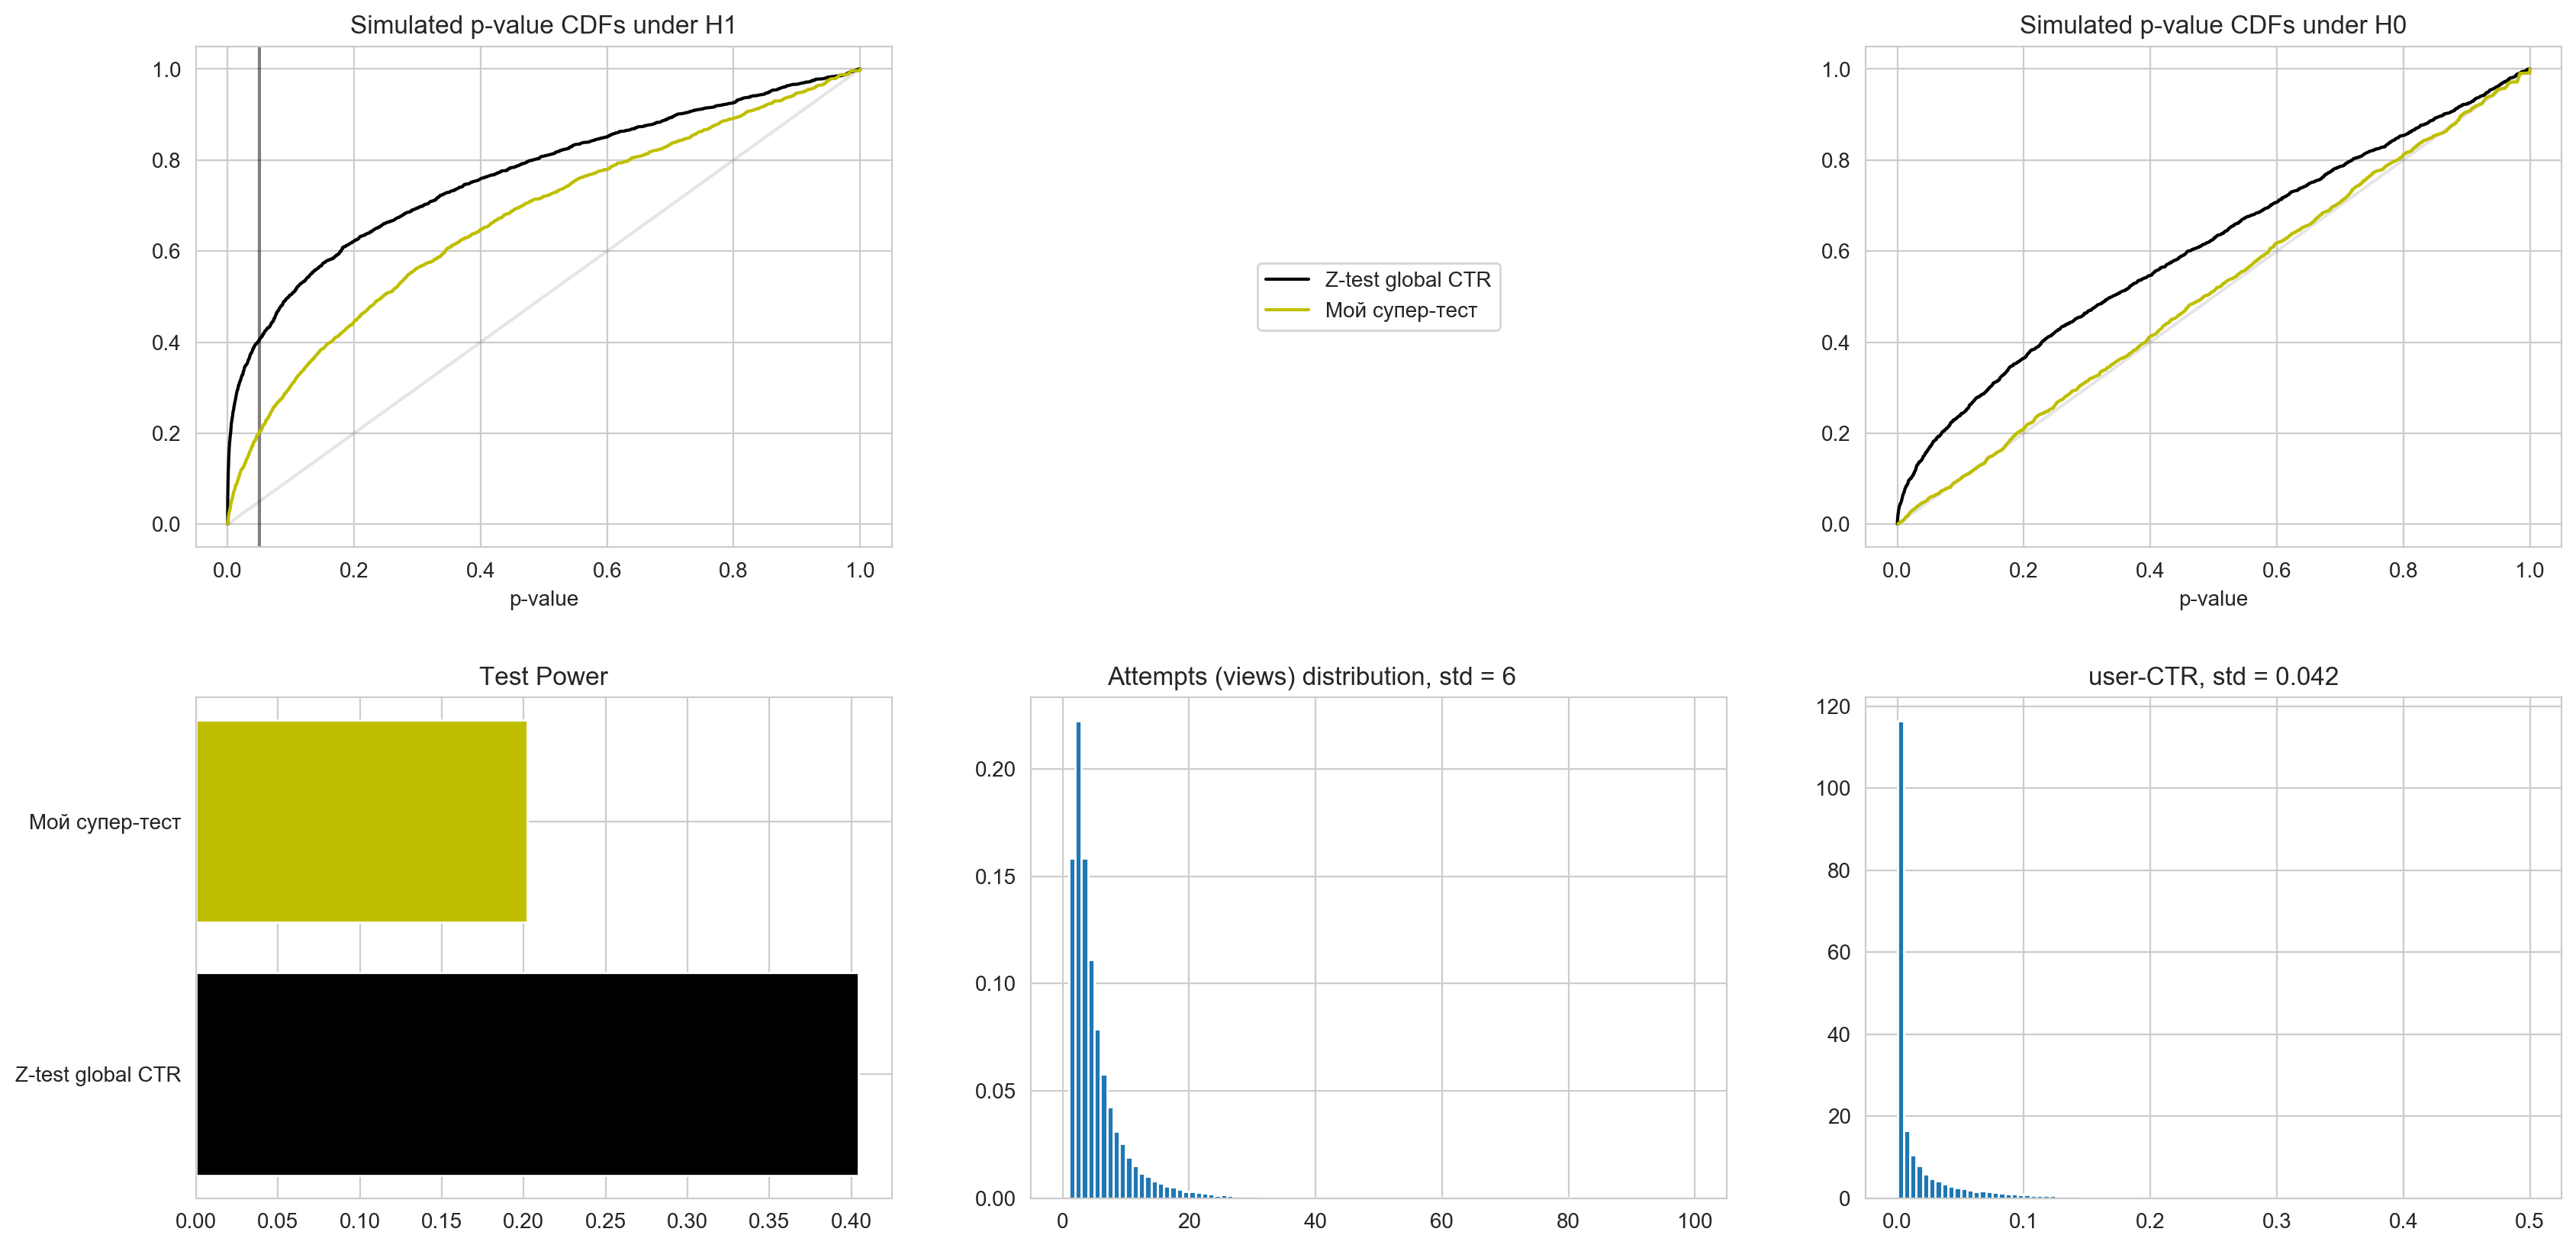

In [111]:
global_ctr_0_ab = successes_0_ab.sum(axis=1) / attempts_0_ab.sum(axis=1)
global_ctr_1_ab = successes_1_ab.sum(axis=1) / attempts_1_ab.sum(axis=1)
global_ctr_0_aa = successes_0_aa.sum(axis=1) / attempts_0_aa.sum(axis=1)
global_ctr_1_aa = successes_1_aa.sum(axis=1) / attempts_1_aa.sum(axis=1)

global_ctr_z_test_ab = proportions_diff_z_test(global_ctr_0_ab, attempts_0_ab.sum(axis=1), 
                                               global_ctr_1_ab, attempts_1_ab.sum(axis=1))
global_ctr_z_test_aa = proportions_diff_z_test(global_ctr_0_aa, attempts_0_aa.sum(axis=1), 
                                               global_ctr_1_aa, attempts_1_aa.sum(axis=1))

t_test_ab = t_test(successes_0_ab, successes_1_ab)
t_test_aa = t_test(successes_0_aa, successes_1_aa)

fig = plot_summary({
    'Z-test global CTR': (global_ctr_z_test_ab, global_ctr_z_test_aa, 'k-'),
    'Мой супер-тест': (t_test_ab, t_test_aa, 'y-')

}, attempts_0_ab, gt_success_rates)